In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for NLP (Udemy)/Projects/Course-data/CourseData.csv')

In [45]:
data.head()

,Unnamed: 0,text
0,0,"Now, I won't deny that when I purchased this o..."
1,1,"The saddest thing about this ""tribute"" is that..."
2,2,Last night I decided to watch the prequel or s...
3,3,I have to admit that i liked the first half of...
4,4,I was not impressed about this film especially...


In [46]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [47]:
data.head()

,text
0,"Now, I won't deny that when I purchased this o..."
1,"The saddest thing about this ""tribute"" is that..."
2,Last night I decided to watch the prequel or s...
3,I have to admit that i liked the first half of...
4,I was not impressed about this film especially...


In [48]:
print("Number of rows: {}".format(data.shape[0]))

Number of rows: 25000


**To change the name of the column**

In [49]:
data.columns = ['Review_text']

In [50]:
data.columns

Index(['Review_text'], dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_text  25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


In [52]:
data.isnull().sum()

Review_text    0
dtype: int64

In [53]:
data.duplicated().sum()

96

In [54]:
data.drop_duplicates(inplace = True)

In [55]:
data.duplicated().sum()

0

In [56]:
empty = []
for i in data['Review_text']:
  if i.isspace() == True:
    empty.append(i)

In [57]:
print(empty)

[]


# **Sentiment-Analysis**

In [58]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyze = SentimentIntensityAnalyzer()

In [60]:
review = 'That was a crazy movie. I definitely loved this movie.'

In [61]:
sentanalyze.polarity_scores(review)

{'neg': 0.171, 'neu': 0.357, 'pos': 0.471, 'compound': 0.6369}

**Add new col 'scores' for polarity_scores**

In [62]:
data['Scores'] = data['Review_text'].apply(lambda review: sentanalyze.polarity_scores(review))

In [63]:
data.head()

,Review_text,Scores
0,"Now, I won't deny that when I purchased this o...","{'neg': 0.086, 'neu': 0.716, 'pos': 0.198, 'co..."
1,"The saddest thing about this ""tribute"" is that...","{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com..."
2,Last night I decided to watch the prequel or s...,"{'neg': 0.038, 'neu': 0.867, 'pos': 0.094, 'co..."
3,I have to admit that i liked the first half of...,"{'neg': 0.135, 'neu': 0.715, 'pos': 0.15, 'com..."
4,I was not impressed about this film especially...,"{'neg': 0.106, 'neu': 0.754, 'pos': 0.14, 'com..."


In [64]:
data['compound'] = data['Scores'].apply(lambda f:f['compound'])

In [65]:
data.head()

,Review_text,Scores,compound
0,"Now, I won't deny that when I purchased this o...","{'neg': 0.086, 'neu': 0.716, 'pos': 0.198, 'co...",0.9410
1,"The saddest thing about this ""tribute"" is that...","{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com...",-0.9367
2,Last night I decided to watch the prequel or s...,"{'neg': 0.038, 'neu': 0.867, 'pos': 0.094, 'co...",0.8002
3,I have to admit that i liked the first half of...,"{'neg': 0.135, 'neu': 0.715, 'pos': 0.15, 'com...",-0.4825
4,I was not impressed about this film especially...,"{'neg': 0.106, 'neu': 0.754, 'pos': 0.14, 'com...",0.6718


**New col for positive/negative reviews**

In [66]:
data['p/n'] = data['compound'].apply(lambda compound:"Positive" if compound>=0 else "Negative") # here compound after lambda is a variable, you can take that as you prefer.

In [67]:
data.head()

,Review_text,Scores,compound,p/n
0,"Now, I won't deny that when I purchased this o...","{'neg': 0.086, 'neu': 0.716, 'pos': 0.198, 'co...",0.9410,Positive
1,"The saddest thing about this ""tribute"" is that...","{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com...",-0.9367,Negative
2,Last night I decided to watch the prequel or s...,"{'neg': 0.038, 'neu': 0.867, 'pos': 0.094, 'co...",0.8002,Positive
3,I have to admit that i liked the first half of...,"{'neg': 0.135, 'neu': 0.715, 'pos': 0.15, 'com...",-0.4825,Negative
4,I was not impressed about this film especially...,"{'neg': 0.106, 'neu': 0.754, 'pos': 0.14, 'com...",0.6718,Positive


Isolate the review_text and positive/negative columns

In [68]:
data = data[['Review_text','p/n']]

In [69]:
data

,Review_text,p/n
0,"Now, I won't deny that when I purchased this o...",Positive
1,"The saddest thing about this ""tribute"" is that...",Negative
2,Last night I decided to watch the prequel or s...,Positive
3,I have to admit that i liked the first half of...,Negative
4,I was not impressed about this film especially...,Positive
...,...,...
24995,"This film is fun, if your a person who likes a...",Positive
24996,After seeing this film I feel like I know just...,Positive
24997,first this deserves about 5 stars due to actin...,Negative
24998,If you like films that ramble with little plot...,Positive


rename the p/n value as reviews

In [70]:
data.columns = ['Review_text','Review']

# **Text Classification**

In [86]:
data['Review'].value_counts()

Positive    16390
Negative     8514
Name: Review, dtype: int64

In [85]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(6,5))
# sns.set(style='darkgrid',font_scale=1.2)
# sns.countplot(data.Review)
# plt.show()

In [80]:
# data['Review_text'].dtype

dtype('O')

In [87]:
x = data['Review_text']
y = data['Review']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
textclf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [92]:
textclf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [93]:
predictions = textclf.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [96]:
print(accuracy_score(predictions,y_test))

0.8276231263383298


In [97]:
cm = confusion_matrix(predictions,y_test)

In [99]:
print(cm)

[[1858  516]
 [ 772 4326]]


In [100]:
import matplotlib
matplotlib.rc('figure',figsize=(20,10))

In [101]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False,True])

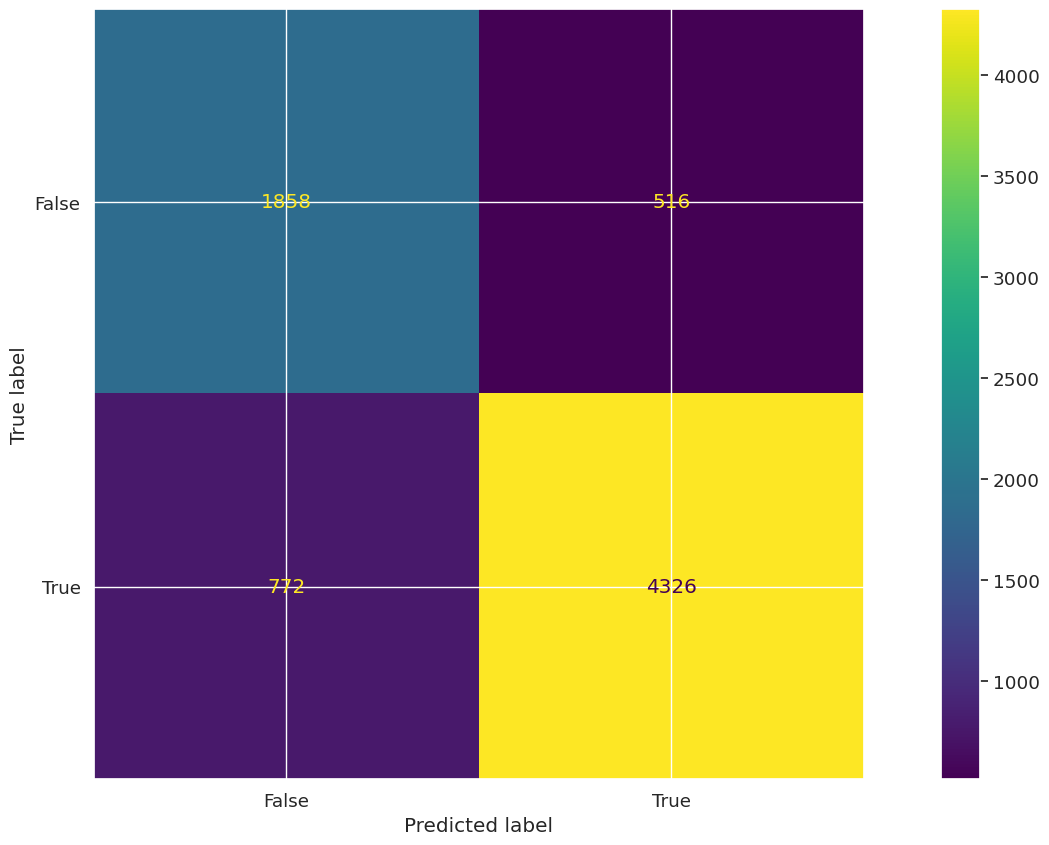

In [102]:
cm_display.plot()
plt.show()

In [105]:
newreview = [('Movie was perfect. I like it so much.')]

In [106]:
textclf.predict(newreview)

array(['Positive'], dtype=object)